## Tutorial 1: Transient simulation and figures

### Import python powerfactory module 

In [1]:
import sys
sys.path.append(r"C:\DigSILENT15p1p7\python") # set the path to python folder inside your digsilent instalatio folder

# import  PowerFactory  module
import powerfactory

### Opening digsilent and project and calling DigSILENT commands

In [2]:
# start PowerFactory  in engine  mode
app = powerfactory.GetApplication('jmmauricio','') # change 'jmmauricio' by your user name and '' by your password

# activate project
project = app.ActivateProject("Nine Bus System")  # change "Nine Bus System" by the name of your project
prj = app.GetActiveProject()    # active project instance

print('prj: {:s}'.format(prj)) # to check if the project is opened properly

ldf = app.GetFromStudyCase("ComLdf")    # Load flow
ini = app.GetFromStudyCase('ComInc')    # Dynamic initialization
sim = app.GetFromStudyCase('ComSim')    # Transient simulations

prj: <l3>\jmmauricio.IntUser\Nine Bus System.IntPrj</l3>


### Getting elements and defining ouput channels

In [3]:
buses = app.GetCalcRelevantObjects("*.ElmTerm")
syms = app.GetCalcRelevantObjects("*.ElmSym")
loads = app.GetCalcRelevantObjects("*.ElmLod")

elmres = app.GetFromStudyCase('Results.ElmRes')

# channels for buses
for bus in buses:
    elmres.AddVars(bus,'m:u','m:phiu','m:fehz')  # creating channels for:
                                                 # voltage ('m:u'),  angle ('m:phi') and frequency ('m:fehz')  
# channels for synchronous machines
for sym in syms:
    elmres.AddVars(sym, 
                   's:ve',    # p.u  Excitation Voltage
                   's:pt',    # p.u.   IN    Turbine Power
                   's:ut',    # p.u.   OUT   Terminal Voltage
                   's:ie',    # p.u.   OUT   Excitation Current
                   's:xspeed',# p.u.   OUT   Speed
                   's:xme',   # p.u.   OUT   Electrical Torque
                   's:xmt',   # p.u.   OUT   Mechanical Torque
                   's:cur1',  # p.u.   OUT   Positive-Sequence Current, Magnitude
                   's:P1',    # MW     OUT   Positive-Sequence, Active Power
                   's:Q1',    # Mvar   OUT   Positive-Sequence, Reactive Power
                   'c:firel', # deg    Rotor angle with reference to reference machine angle 
                   )

# channels for loads
for load in loads:                        # creating channels for:
    elmres.AddVars(load, 'n:u1:bus1',     # voltage ('m:u')
                         'm:I1:bus1',     # current ('s:P1')
                         'm:Psum:bus1',   # active power ('s:P1')
                         'm:Qsum:bus1')   # reactive power ('s:Q1')    
    

In [4]:
buses

[<powerfactory.DataObject <l1>\jmmauricio.IntUser\Nine Bus System.IntPrj\Network Model.IntPrjfolder\Network Data.IntPrjfolder\Nine_Bus.ElmNet\System Stage Mag-A-Stat.IntVariant\Terminal_i.ElmTerm</l1>>,
 <powerfactory.DataObject <l1>\jmmauricio.IntUser\Nine Bus System.IntPrj\Network Model.IntPrjfolder\Network Data.IntPrjfolder\Nine_Bus.ElmNet\System Stage Mag-A-Stat.IntVariant\Line 2.ElmBranch\Fault.ElmTerm</l1>>,
 <powerfactory.DataObject <l1>\jmmauricio.IntUser\Nine Bus System.IntPrj\Network Model.IntPrjfolder\Network Data.IntPrjfolder\Nine_Bus.ElmNet\System Stage Mag-A-Stat.IntVariant\Bus 1.ElmTerm</l1>>,
 <powerfactory.DataObject <l1>\jmmauricio.IntUser\Nine Bus System.IntPrj\Network Model.IntPrjfolder\Network Data.IntPrjfolder\Nine_Bus.ElmNet\System Stage Mag-A-Stat.IntVariant\Bus 2.ElmTerm</l1>>,
 <powerfactory.DataObject <l1>\jmmauricio.IntUser\Nine Bus System.IntPrj\Network Model.IntPrjfolder\Network Data.IntPrjfolder\Nine_Bus.ElmNet\System Stage Mag-A-Stat.IntVariant\Bus 3.Elm

### Generation of events

In [39]:
events_folder = app.GetFromStudyCase('IntEvt');  # to get events folder

evt1 = events_folder.CreateObject('EvtSwitch', 'generator 1 trip event');  # generator switch event is created here
evt1[0].p_target = syms[2]   # event target is the second synchronous generator
evt1[0].time = 1.0

#evt1.clear()
#evt2.clear()

In [40]:
evt1

[<powerfactory.DataObject <l1>\jmmauricio.IntUser\Nine Bus System.IntPrj\Study Cases.IntPrjfolder\Five-Cycles Fault Mag-A-Stat.IntCase\Simulation Events/Fault.IntEvt\generator 1 trip event.EvtSwitch</l1>>,
 'EvtSwitch',
 'generator 1 trip event']

In [41]:
#print(evt1[0].time)
#print(evt2)

### Power flow settings and execution

In [42]:
ldf.iopt_net = 0
ldf.Execute()

0

### Dynamic initialization

In [43]:
ini.iopt_dtgrd = 0.001  # step size 
ini.Execute()

0

### Transient simulation

In [44]:
sim.tstop = 10.0
sim.Execute()

0

### Results exportation

In [45]:
comres = app.GetFromStudyCase('ComRes'); 
comres.iopt_csel = 0
comres.iopt_tsel = 0
comres.iopt_locn = 2
comres.ciopt_head = 1
comres.pResult=elmres
comres.f_name = r'C:\Users\jmmauricio\hola.txt'  # change 'C:\Users\jmmauricio\hola.txt' with your path
comres.iopt_exp=4
comres.Execute()

0

### Modifications removal

In [46]:
evt1.clear()
events_folder.Delete()

0

## Import results with pypstools

In [47]:
import pypstools.digsilent_simulation as ds
res = ds.ds_2_dict(r'C:\Users\jmmauricio\hola.txt')
print(res['sys'])


{'genstats': [], 'loads': ['Fault location', 'Load A', 'Load B', 'Load C'], 'time': array([-0.082, -0.073, -0.064, ...,  9.98 ,  9.989,  9.998]), 'usrmodels': [], 'syms': ['G1', 'G2', 'G3'], 'buses': ['Terminal_i', 'Fault', 'Bus 1', 'Bus 2', 'Bus 3', 'Bus 4', 'Bus 5', 'Bus 6', 'Bus 7', 'Bus 8', 'Bus 9']}


## Plot results with matplolib

### Figure with synchronous generators speeds and powers

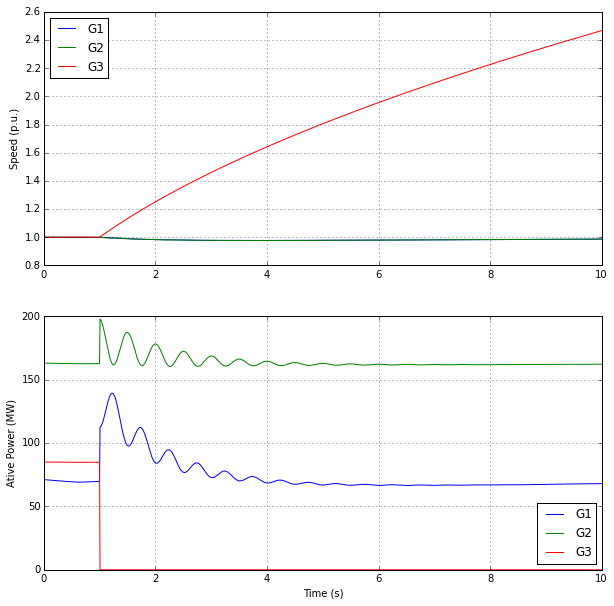

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

# create figure and axis instances
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10))

t = res['sys']['time']  # simulation time vector

# axe 1
ax0.plot(t,res['sym']['G1']['speed']['data'], label='G1') 
ax0.plot(t,res['sym']['G2']['speed']['data'], label='G2')
ax0.plot(t,res['sym']['G3']['speed']['data'], label='G3')
ax0.legend(loc='best')
ax0.grid(True)
ax0.set_ylabel('Speed (p.u.)')
ax0.set_xlim((0,t[-1]))

# ax 2
ax1.plot(t,res['sym']['G1']['p']['data'], label='G1')
ax1.plot(t,res['sym']['G2']['p']['data'], label='G2')
ax1.plot(t,res['sym']['G3']['p']['data'], label='G3')
ax1.legend(loc='best')
ax1.grid(True)
ax1.set_ylabel('Ative Power (MW)')
ax1.set_xlim((0,t[-1]))

ax1.set_xlabel('Time (s)')

### Figure with load voltages and powers

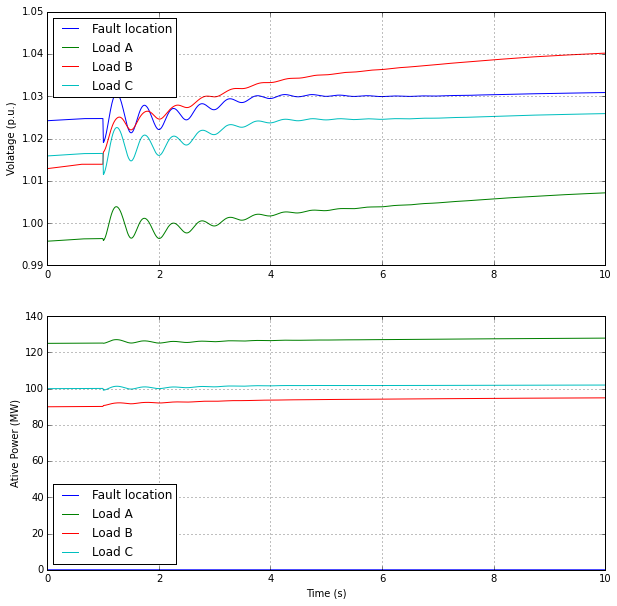

In [49]:
# create figure and axis instances
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10))

t = res['sys']['time']  # simulation time vector

# axe 1
for load in res['sys']['loads']:
    ax0.plot(t,res['load'][load]['n:u1:bus1 in p.u.']['data'], label=load) 
ax0.legend(loc='best')
ax0.grid(True)
ax0.set_ylabel('Volatage (p.u.)')
ax0.set_xlim((0,t[-1]))

# ax 2
for load in res['sys']['loads']:
    ax1.plot(t,res['load'][load]['p']['data'], label=load)
ax1.legend(loc='best')
ax1.grid(True)
ax1.set_ylabel('Ative Power (MW)')
ax1.set_xlim((0,t[-1]))

ax1.set_xlabel('Time (s)')

#### Voltages at selected buses

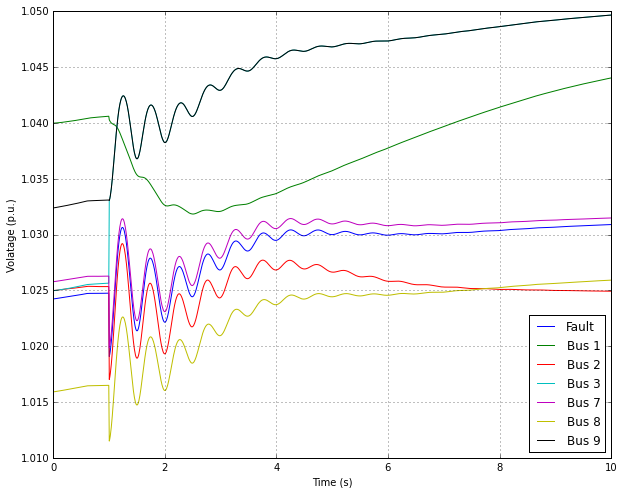

In [50]:
# create figure and axis instances
fig, (ax0) = plt.subplots(nrows=1, figsize=(10, 8))

t = res['sys']['time']  # simulation time vector

buses = ['Fault',
         'Bus 1',
         'Bus 2',
         'Bus 3',
         'Bus 7',
         'Bus 8',
         'Bus 9']
# axe 1
for bus in buses:
    ax0.plot(t,res['bus'][bus]['m:u in p.u.']['data'], label=bus) 
ax0.legend(loc='best')
ax0.grid(True)
ax0.set_ylabel('Volatage (p.u.)')
ax0.set_xlim((0,t[-1]))

ax0.set_xlabel('Time (s)')

In [51]:
events_folder


<powerfactory.DataObject <l1>\jmmauricio.IntUser\Settings\Temp\Recycle Bin\Simulation Events/Fault.IntEvt</l1>>